In [20]:
import numpy as np
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn import datasets
from sklearn.decomposition import RandomizedPCA
from matplotlib import pyplot as plt
from matplotlib import cm
%pylab inline

##### data #####
# load digits dataset
data = datasets.load_digits()
t = data['target']

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


This next step

In [21]:
# perform PCA dimensionality reduction on data['data']
pca = RandomizedPCA(n_components=2).fit(data['data']) # pca is an instance of class randomizedPCA with data['data'] 
                                                      # fitted to it.

# transform(X)--> apply dimensionality reduction on X
# X_new : array-like, shape (n_samples, n_components)
X = pca.transform(data['data']) # reduces data from (1797,64) to (1797,2) though not sure how.

##### cluster data into K=1..20 clusters #####
K_MAX = 20
KK = range(1,K_MAX+1)

In [22]:
print (KK)

range(1, 21)


In [23]:
print(list(data)) # each of these "keys" has an associated matrix/array/series.

['data', 'target', 'target_names', 'images', 'DESCR']


In [24]:
print(data['data'].shape) # dataframe?

(1797, 64)


In [25]:
print(data['target'].shape) # series?

(1797,)


In [26]:
print(data['images'].shape) # are these the training data set? One layer for each number?

(1797, 8, 8)


In [27]:
print(data['data'])

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [28]:
print(pca)

RandomizedPCA(copy=True, iterated_power=3, n_components=2, random_state=None,
       whiten=False)


In [29]:
print(X.shape)

(1797, 2)


In [30]:
# experiment with different numbers of clusters. 

KM = [kmeans(X,k) for k in KK] # compute code book/ distortion for each number of clusters
centroids = [cent for (cent,var) in KM] # extract just the code book (cent)
D_k = [cdist(X, cent, 'euclidean') for cent in centroids] # use code book to calulate distances for each point
cIdx = [np.argmin(D,axis=1) for D in D_k] # indices for each min value
dist = [np.min(D,axis=1) for D in D_k] # actual min values

In [46]:
tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares


In [ ]:
totss = sum(pdist(X)**2)/X.shape[0]       # The total sum of squares
betweenss = totss - tot_withinss          # The between-cluster sum of squares

##### plots #####
kIdx = 9        # K=10
# np.linspace(start,stop,num of intervals)
# tolist() - return array as a list
clr = cm.spectral( np.linspace(0,1,10) ).tolist() # for plotting colours in the final plot.
mrk = 'os^p<dvh8>+x.' # A list of marker symbols to be feb to matplotlib scatter

In [54]:
print(X.shape)
print(pdist(X).shape)  # squares the array and divides by two. 
print(1797**2/2)

(1797, 2)
(1613706,)
1614604.5


In [44]:
g = np.linspace(0,1,10).tolist() # 50 is standard number of points.
print(g)

[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0]


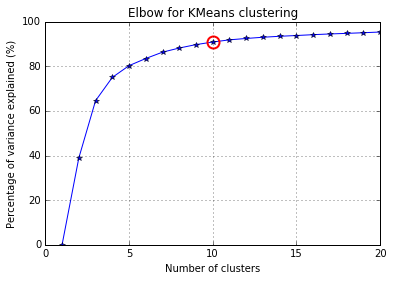

In [18]:
# There are some extra steps in

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')

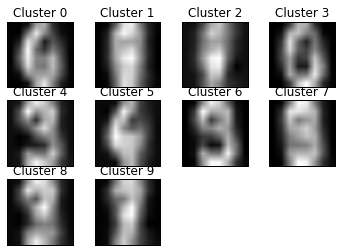

In [19]:
# show centroids for K=10 clusters
plt.figure()

#loop over numbers of clusters 1-10
for i in range(kIdx+1):
    img = pca.inverse_transform(centroids[kIdx][i]).reshape(8,8) # returns instance pca (model fitted with X) with data
    ax = plt.subplot(3,4,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img, cmap=cm.gray)
    plt.title( 'Cluster %d' % i )

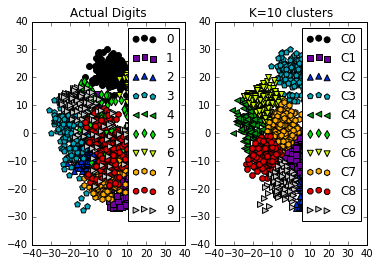

In [20]:
# compare K=10 clustering vs. actual digits (PCA projections)
fig = plt.figure() # setting up the overall plot

# First subplot, actual digits
ax = fig.add_subplot(121)
for i in range(10):
    ind = (t==i)
    ax.scatter(X[ind,0],X[ind,1], s=35, c=clr[i], marker=mrk[i], label='%d'%i)
plt.legend()
plt.title('Actual Digits')

# Adding second plot
ax = fig.add_subplot(122)
for i in range(kIdx+1):
    ind = (cIdx[kIdx]==i)
    ax.scatter(X[ind,0],X[ind,1], s=35, c=clr[i], marker=mrk[i], label='C%d'%i)
plt.legend()
plt.title('K=%d clusters'%KK[kIdx])

plt.show()